## Hypothesis: Air temperature values affect soil moisture 
## Null Hypothesis (H0): Air temperature values do not affect soil moisture 

    
**Data obtained from https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

In [2]:
#monthly soil moisture and precipitation from 1958-2023
df = pd.read_csv("soilM_.precip_maxTemp_CorpusChristi.csv",header=0, parse_dates=True, skiprows= 10)


In [3]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m')


In [4]:
df.set_index('Date', inplace=True)


In [5]:
df.head()

,Year,Month,soil(in),ppt(in),tmax(degF)
Date,,,,,
1958-01-01,1958,1,8.62,3.31,39.27
1958-02-01,1958,2,8.62,3.40,47.35
1958-03-01,1958,3,8.49,1.64,47.64
1958-04-01,1958,4,8.62,4.40,53.98
1958-05-01,1958,5,5.73,0.71,74.68


**Let's have a graphical idea of the relationship between both variables**

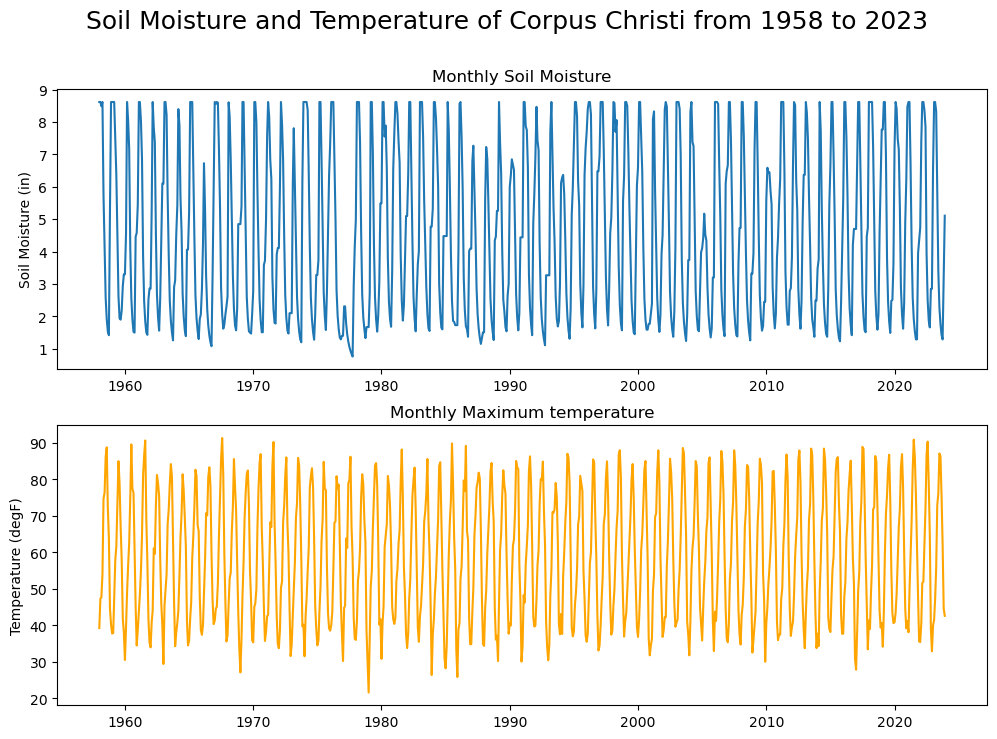

In [6]:


# Creating a figure and a 6x4 grid of subplots with shared x-axis
fig, axes = plt.subplots(2,1, figsize=(12, 8), dpi=100)

# Soil moisture subplot
axes[0].plot(df.index, df['soil(in)'], label='Soil Moisture')
axes[0].set_ylabel('Soil Moisture (in)')
axes[0].set_title('Monthly Soil Moisture')

# temp subplot
axes[1].plot(df.index, df['tmax(degF)'], color='orange', label='Temperature')
axes[1].set_ylabel('Temperature (degF)')
axes[1].set_title('Monthly Maximum temperature')

# Setting the x-axis major formatter to display years
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.suptitle('Soil Moisture and Temperature of Corpus Christi from 1958 to 2023', fontsize=18)
plt.show()



**The correlation between both varibles is not exactly clear from the above graph. We shall proceed with our discoveries**

In [7]:
df3 = df[['tmax(degF)','soil(in)']]


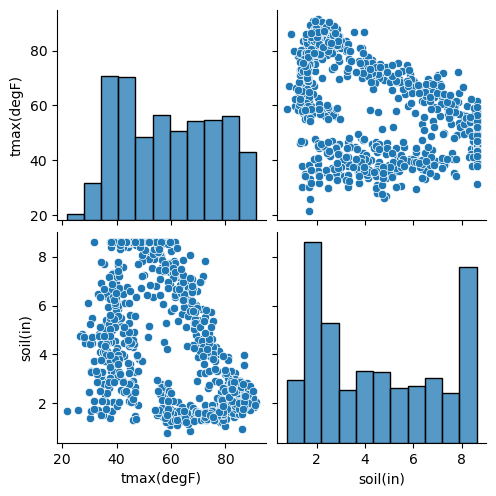

In [8]:
sns.pairplot(df3)
plt.show()

In [9]:
#calculating pearson's coeeficient between airtemp soilmoisture .
r, p_val = pearsonr( df['tmax(degF)'], df['soil(in)'])


In [10]:
print(f" Correlation cc: {r} , Pvalue cc: {p_val}")


 Correlation cc: -0.4471261534861932 , Pvalue cc: 3.4490922861173376e-40


**Correlation (r): The Pearson's correlation coefficient for Corpus  -0.447.This suggests a moderate negative linear relationship between temperature and soil moisture levels in corpus Christi. This means as temperature increases, soil moisture tends to decrease to some extent.**

**P-value: The p-values approximately 3.45×10−40  are significantly small. These indicate that the probability of observing such a correlation by chance (if there were actually no correlation in the population from which the sample was drawn) is extremely low.**

In [11]:
# Calculating Spearman (monotonic) correlation coefficient
spearman_correlation = df['tmax(degF)'].corr(df['soil(in)'], method='spearman')

print(spearman_correlation)

-0.4348323709009757


**A Spearman correlation coefficient of -0.435 suggests a moderate negative association between temperature and soilmoisture. This result suggests that when temperature increases, soil moisture reduces, but there are likely other factors influencing soil moisture as well, given that the correlation is not very close to 1.**

In [12]:

X =df['tmax(degF)']  # Independent variable what im trying to predict
y = df['soil(in)']  # Dependent variable (response)

# Adding a constant to the predictor variable set to represent the intercept
X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

df['predictions'] = results.predict(X)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               soil(in)   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     197.4
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.45e-40
Time:                        22:06:12   Log-Likelihood:                -1789.8
No. Observations:                 792   AIC:                             3584.
Df Residuals:                     790   BIC:                             3593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5281      0.293     29.128      0.0

**The R-squared value is 0.2, which means that approximately 20% of the variability in soil moisture is explained by the model. This isn't very high, suggesting that temperature alone does not fully explain the changes in soil moisture.**

**F-statistic and Prob (F-statistic): The F-statistic is 197.0 with a very small p-value (3.45×10−40), this indicates the statistical significance of the overall regression model. In other words, it is highly unlikely that these results are due to chance.**

**Coefficients:
const: The coefficient for the constant (intercept) is 8.5281, which means when tmax(degF) is 0, the expected value of soil(in) is approximately 8.5281 inches.
tmax(degF): The coefficient for tmax(degF) is -0.0672. This suggests that for each one-degree Fahrenheit increase in temperature, the soil moisture decreases by 0.0672 inches, on average.**

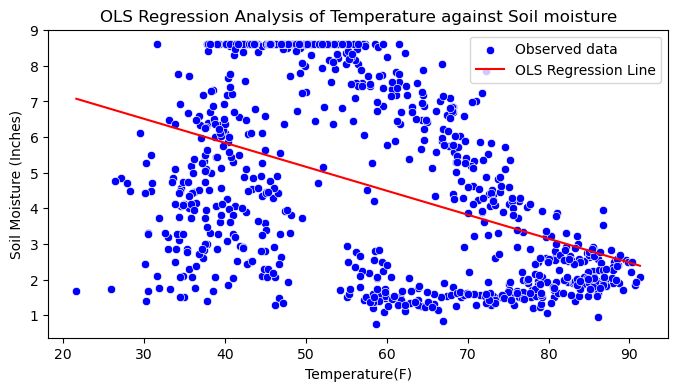

In [13]:
plt.figure(figsize=(8, 4))

# Scatter plot of observed data
sns.scatterplot(x='tmax(degF)', y='soil(in)', data=df, color='blue', label='Observed data')

# Line plot for the regression line
sns.lineplot(x='tmax(degF)', y='predictions', data=df, color='red', label='OLS Regression Line')

plt.title('OLS Regression Analysis of Temperature against Soil moisture')
plt.xlabel('Temperature(F)')
plt.ylabel('Soil Moisture (Inches)')
plt.legend()
plt.show()

**The negative slope of the regression lines indicates that there is a negative relationship between temperature and soil moisture; as temperature increases, the soil moisture tends to decrease. The distribution of points suggests some variability around the regression line, which is expected in real-world data.**

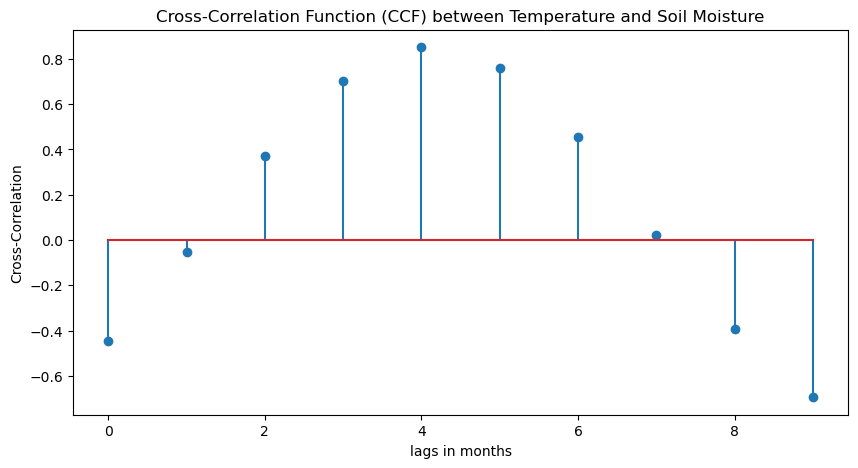

In [14]:
#cross Correlation
import statsmodels.tsa.stattools as smt


# Calculate Cross-Correlation Function (CCF) between 'ppt(in)' and 'soil(in)'
max_lags = 10
ccf_results = smt.ccf(df['tmax(degF)'], df['soil(in)'], adjusted=False)[:max_lags]

plt.figure(figsize=(10, 5))
plt.stem(range(max_lags), ccf_results, use_line_collection=True)
plt.xlabel('lags in months')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Function (CCF) between Temperature and Soil Moisture')
plt.show()


**Lag 0: The plot shows a negative correlation at lag 0, indicating that higher temperatures are associated with lower soil moisture levels at the same time point. This is consistent with the understanding that higher temperatures can lead to increased evaporation and thus reduce soil moisture.**

**Intermittent Positive Peaks: The fact that not every lag shows a strong positive correlation, and that the correlation varies, indicates that the relationship between temperature and soil moisture might be influenced by other factors or is not consistent over time.**

**Lags 1-9: As the lag increases, the correlation values fluctuate above and below zero but are generally lower than at lag 0. The positive values indicate a positive correlation at those lags, meaning that past values of one variable are positively associated with future values of the other variable.**

In [21]:
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Paired T-test
t_stat, p_val = stats.ttest_rel(df['tmax(degF)'], df['soil(in)'])

print(t_stat, p_val)

82.08876710053872 0.0


**NOTE: This test does not directly test for correlation T-statistic: The positive value of the t-statistic suggests that temp has a higher mean than soil mositure when paired by their respective observations.**

**P-value: The p-value is a measure of the probability that the observed result, or one more extreme, would occur under the null hypothesis. A p-value of 0 is below the significance level indicating that the result is statistically significant. It suggests that the difference in means you observed between the two paired samples ('tmax(degF)' and 'soil(in)') is highly statistically significant.**

In [22]:
# Z-Test
z_stat, p_z_val = ztest(df['tmax(degF)'], df['soil(in)'])
print(z_stat, p_z_val)

87.32038785223506 0.0


**NOTE: The Z does not directly test for correlation either**

In [23]:
#grangercausalitytest: used to see if meaning one variable's past values are used to predict
#another variable's future values
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 12  # Or another appropriate lag based on your data
test_result = grangercausalitytests(df[['tmax(degF)', 'soil(in)']], maxlag=maxlag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=485.7850, p=0.0000  , df_denom=788, df_num=1
ssr based chi2 test:   chi2=487.6345, p=0.0000  , df=1
likelihood ratio test: chi2=379.8777, p=0.0000  , df=1
parameter F test:         F=485.7850, p=0.0000  , df_denom=788, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=133.2441, p=0.0000  , df_denom=785, df_num=2
ssr based chi2 test:   chi2=268.1856, p=0.0000  , df=2
likelihood ratio test: chi2=230.8997, p=0.0000  , df=2
parameter F test:         F=133.2441, p=0.0000  , df_denom=785, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=74.7341 , p=0.0000  , df_denom=782, df_num=3
ssr based chi2 test:   chi2=226.2092, p=0.0000  , df=3
likelihood ratio test: chi2=198.8940, p=0.0000  , df=3
parameter F test:         F=74.7341 , p=0.0000  , df_denom=782, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=60.2497 , p=0.0000  

**For Lags 1 to 12: The significant results (p-values = or near zero) from lags 1 through 12 strongly suggest that past values of tempearture do have a predictive relationship with future soil moisture levels. This is a clear indication to reject the null hypothesis in favor of the alternative hypothesis for these lags. The evidence shows that the relationship between temperature and soil moisture becomes apparent when considering the influence of temperature on future soil moisture levels.**

In [25]:

'''ANOVA table to test the significance of the ols model from statsmodels'''

# Regression Analysis
X = df['tmax(degF)']  # Predictor
y = df['soil(in)']  # Response variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
est = sm.OLS(y, X).fit()
# ANOVA

anova_results = ols('Q("tmax(degF)") ~ C(Q("soil(in)"))', data=df).fit()

anova_table = sm.stats.anova_lm(anova_results, typ=2)

print(anova_table)

                         sum_sq     df         F        PR(>F)
C(Q("soil(in)"))  178711.779075  407.0  2.983541  2.499415e-26
Residual           56514.250146  384.0       NaN           NaN


**Sum of Squares: For C(Q("soil(in)")): 178711.779075 This is the sum of squared deviations of the group means from the overall mean, indicating the variance explained by the model. For Residual:  56514.250146 This is the sum of squared deviations of observations from their group means, indicating the variance not explained by the model. The F-statistic and its associated p-value suggest that there are statistically significant differences in the means of the dependent variable across different groups or levels of temperature. This implies that temperature has a significant effect on soil moisture.**

**Given the very low p-value (2.499*10-26), we have strong evidence against the null hypothesis of no effect, indicating that changes in ptemperature are associated with changes in the dependent soil moisture**



## Based on all the above analysis, we reject the null hypothesis